In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp
import seaborn as sns
import sweetviz as sv
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#import data set
startup_data0 = pd.read_csv("C:/Users/0004IW744/Desktop/Python/Assignments/5.Multi Linear Regression/50_Startups.csv")

# Exploratory data Analysis(EDA-1)

In [3]:
startup_data0.info() # No null values, correct adata types

NameError: name 'startup_data0' is not defined

In [4]:
startup_data0 = startup_data0.drop('State',axis = 1)  

State column is dropped as we have categorical data which is no use for finding the Profit

In [5]:
startup_data0.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

There are no null values, dtypes are fine

In [6]:
startup_data0[startup_data0.duplicated()]  #no duplicate values

,R&D Spend,Administration,Marketing Spend,Profit


In [7]:
#rename
startup_data0 = startup_data0.rename({'R&D Spend':'RS','Administration':'Admin','Marketing Spend':'MS'},axis = 1)

# CORRELATION

In [8]:
startup_data0.corr()

,RS,Admin,MS,Profit
RS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


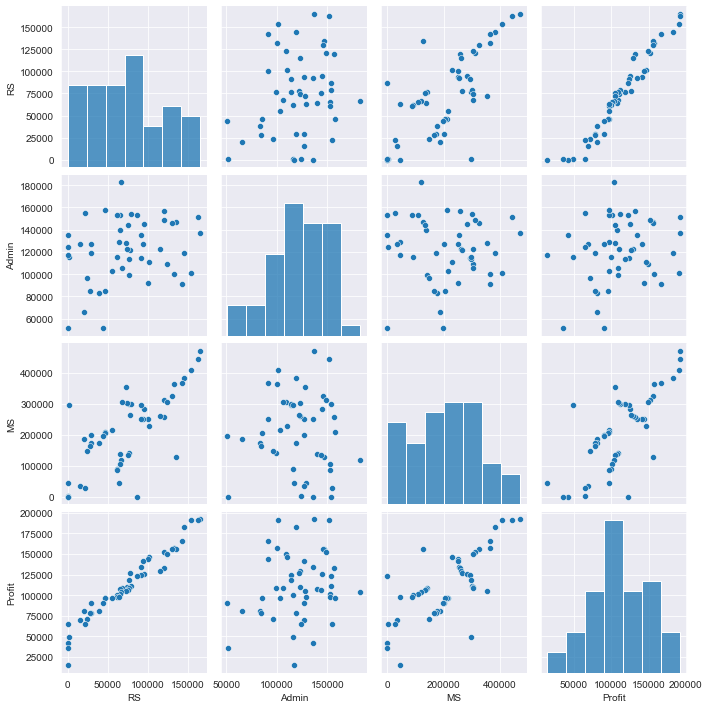

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(startup_data0)
plt.show()

# Model building along with normalisation

In [14]:
import statsmodels.formula.api as smf

In [15]:
model0 = smf.ols('Profit~RS+Admin+MS',data=startup_data0).fit() #Building model0

In [16]:
model0.params #coefficients

Intercept    50122.192990
RS               0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [17]:
print(np.round(model0.tvalues,4), '\n',np.round(model0.pvalues,4))

Intercept     7.6262
RS           17.8464
Admin        -0.5255
MS            1.6551
dtype: float64 
 Intercept    0.0000
RS           0.0000
Admin        0.6018
MS           0.1047
dtype: float64


Admin and MS values are greater than 0.05 i.e insignificant variables

In [18]:
(model0.rsquared,model0.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

Building model with each insignificant variables to check the r2

In [22]:
ml_Ad=smf.ols('Profit~Admin',data = startup_data0).fit() #p>0.05, insignificant
print(ml_Ad.tvalues, '\n', ml_Ad.pvalues) 
(ml_Ad.rsquared,ml_Ad.rsquared_adj)

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


(0.04028714077757245, 0.020293122877105274)

In [23]:
ml_MS=smf.ols('Profit~MS',data = startup_data0).fit() #p<0.05, single MS is significant
print(np.round(ml_MS.tvalues,15), '\n',np.round(ml_MS.pvalues,15))
(ml_MS.rsquared,ml_MS.rsquared_adj)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294740e-10
MS           4.381070e-10
dtype: float64


(0.5591535746115515, 0.5499692740826254)

In [24]:
ml_Ad_MS=smf.ols('Profit~Admin+MS',data = startup_data0).fit() #p<0.05,Admin+MS is significant 
print(ml_Ad_MS.tvalues, '\n', ml_Ad_MS.pvalues) 
(ml_Ad_MS.rsquared,ml_Ad_MS.rsquared_adj)

Intercept    1.142741
Admin        2.467779
MS           8.281039
dtype: float64 
 Intercept    2.589341e-01
Admin        1.729198e-02
MS           9.727245e-11
dtype: float64


(0.6097229746770663, 0.593115441684601)

# Model Validation

1. Collinearty check

Checking VIF values, for independent variables RS+Admin+MS

In [25]:
rsq_rs = smf.ols('RS~ Admin+MS', data=startup_data0).fit().rsquared
vif_rs = 1/(1-rsq_rs)

In [26]:
rsq_adm = smf.ols('Admin ~ RS+MS', data=startup_data0).fit().rsquared
vif_adm = 1/(1-rsq_adm)

In [27]:
rsq_ms = smf.ols('MS ~ RS+Admin', data=startup_data0).fit().rsquared
vif_ms = 1/(1-rsq_ms)

In [28]:
vif = {'Variables':['RS','Admin','MS'], 'Vif':[rsq_rs,rsq_adm,rsq_ms]}
vif_data= pd.DataFrame(vif)
vif_data

,Variables,Vif
0,RS,0.594962
1,Admin,0.149002
2,MS,0.570220


Vif value is less than the 10. So no Collinearty exists

# Residual Analysis

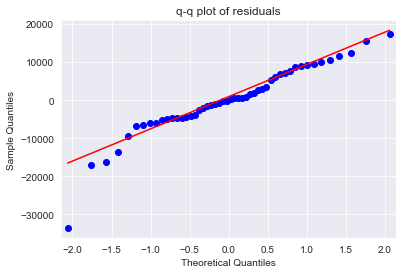

In [33]:
import statsmodels.api as sm
qqplot = sm.qqplot(model0.resid, line = 'q')
plt.title("q-q plot of residuals")
plt.show()

In [37]:
list(np.where(model0.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

Residual plot for homoscedasticity

Text(0, 0.5, 'standarized residual values')

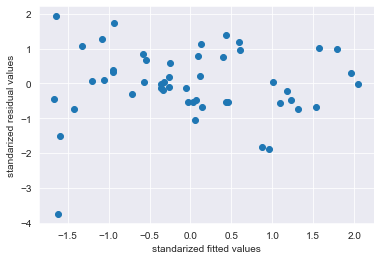

In [43]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(get_standardized_values(model0.fittedvalues),get_standarddized_values(model0.resid))
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')

# Test of errors (Residual Vs Regressor)

plot the figure for every independent variable

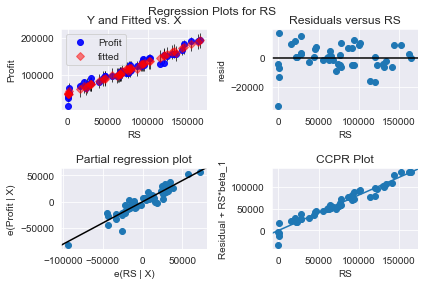

In [51]:
sm.graphics.plot_regress_exog(model0,'RS' )
plt.show()

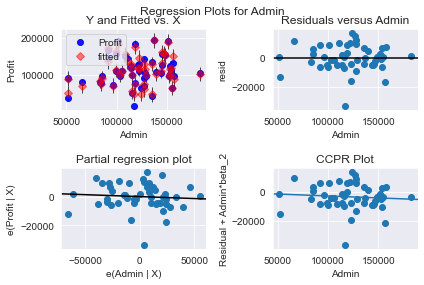

In [53]:
sm.graphics.plot_regress_exog(model0,'Admin')
plt.show()

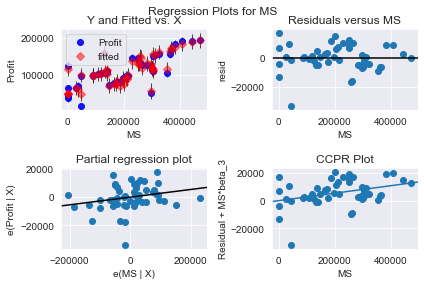

In [55]:
sm.graphics.plot_regress_exog(model0,'MS')
plt.show()

# Model Deletion Diagnostics

Finding Cooks Distance and Influencers/outliers

In [60]:
model_influence = model0.get_influence()

In [64]:
(c,_) = model0.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

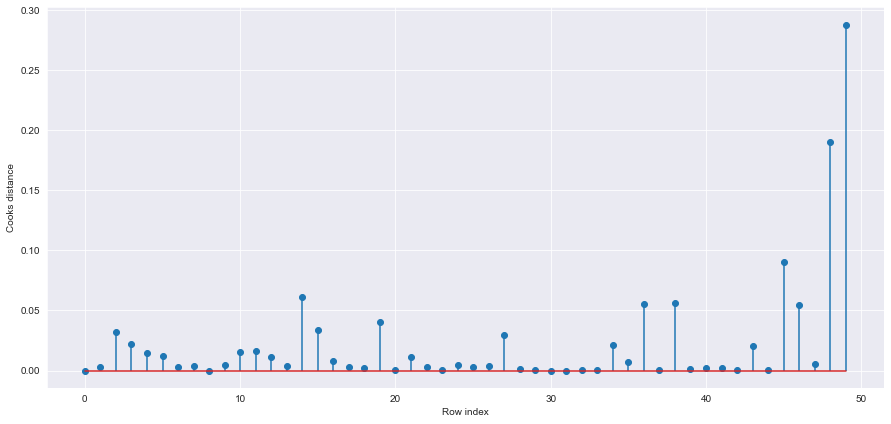

In [66]:
#plotting influencers using stem plot
fig = plt.subplots(figsize=(15, 7))
plt.stem(np.arange(len(startup_data0)), np.round(c,4))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [67]:
#Getting maximum values and index of influencer
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

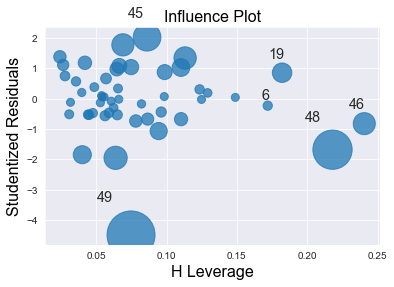

In [80]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model0)
plt.show()

we can see that value 49 is influencer

In [ ]:
#finding leverage cutoff(delete the c value points after this value)

In [82]:
k = startup_data0.shape[1] # K is no. of columns
n = startup_data0.shape[0] # n is no. of rows
# leverage cutoff value
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.30000000000000004


In [83]:
startup_data0[startup_data0.index.isin([49])]

,RS,Admin,MS,Profit
49,0.0,116983.8,45173.06,14681.4


In [84]:
startup_data0.shape

(50, 4)

In [85]:
startup_data1 = startup_data0.drop(startup_data0.index[[49]],axis=0)  #Removing the outlier column detected above
startup_data1.shape

(49, 4)

# Rebuiling Model again as we removed on outliers

In [96]:
model1 = smf.ols('Profit ~ MS+Admin+RS', data = startup_data1).fit()

In [101]:
model1.rsquared,model1.aic

(0.9613162435129847, 1020.5652974526366)

<StemContainer object of 3 artists>

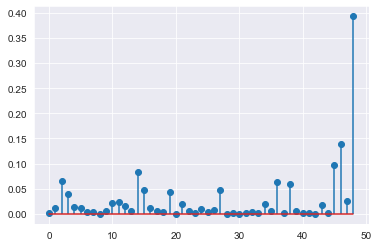

In [106]:
(c,_) = model1.get_influence().cooks_distance
plt.stem(np.arange(len(startup_data1)),np.round(c,3))

In [119]:
np.argmax(c),np.max(c)

(48, 0.3927442055632136)

In [120]:
k = startup_data1.shape[1]
n = startup_data1.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff


0.30612244897959184

In [126]:
startup_data1.shape

(49, 4)

In [127]:
startup_data2 = startup_data1.drop(startup_data1.index[[48]],axis=0) 
startup_data2.shape

(48, 4)

In [138]:
model2 = smf.ols('Profit ~ np.square(MS)+np.square(Admin)+np.square(RS)', data = startup_data2).fit()

In [140]:
model2.rsquared,model2.aic

(0.9030246801697206, 1040.5011955353489)

Collection of R^2 Values

In [151]:
collection={'Model Name':['Mode0','Model1','Model2'],'Rsquared':[model0.rsquared,model1.rsquared,model2.rsquared]}
table=pd.DataFrame(collection)
table

,Model Name,Rsquared
0,Mode0,0.950746
1,Model1,0.961316
2,Model2,0.903025


# Model Predictions

In [152]:
pred_data=pd.DataFrame({'RS':5000,"Admin":7000,"MS":90000},index=[0])
pred_data

,RS,Admin,MS
0,5000,7000,90000


In [153]:
model1.predict(pred_data)

0    58413.065269
dtype: float64